# Setup

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from tabulate import tabulate

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf

import qda

import os
import re
from scipy import ndimage
import math
import random
import cv2
import skimage
from scipy import stats
import pylab

from PIL import Image, ImageEnhance
from skimage.measure import label, regionprops
from skimage.io import imsave
from skimage.filters import threshold_otsu

from sklearn.decomposition import PCA

# Helper functions

In [28]:
def check_gaussianity(data_points, title="",plotto=0):
	if plotto==1:
		plt.figure(figsize=(12,4))
		plt.subplot(1, 3, 1)
		stats.probplot(data_points,plot=plt)
		plt.subplot(1, 3, 2)
		plt.hist(data_points)
		plt.subplot(1, 3, 3)
		plt.plot(data_points,'o-')
		plt.suptitle(f"{title}")
		plt.show()
	_, shapiro_pvalue = stats.shapiro(data_points)
	print(f"({title}) Normality p-value = {shapiro_pvalue} - Normality at alpha 5%? {shapiro_pvalue>0.05}")

In [38]:
def check_randomness(data_points, title="",plotto=0):
	if plotto==1:
		plt.figure(figsize=(8,4))
		plt.plot(data_points,'o-')
		plt.suptitle(f"{title}")
		plt.show()
	_, pval_runs = runstest_1samp(data_points, correction=False)
	print(f'({title}) Runs test p-value = {pval_runs} - Random data at alpha 5%? {pval_runs>0.05}')

In [55]:
def check_autocorrelation(data_points):
	fig, ax = plt.subplots(2, 1)
	sgt.plot_acf(data_points, lags = int(len(data_points)/3), zero=False, ax=ax[0])
	fig.subplots_adjust(hspace=0.5)
	sgt.plot_pacf(data_points, lags = int(len(data_points)/3), zero=False, ax=ax[1], method = 'ywm')
	plt.show()	

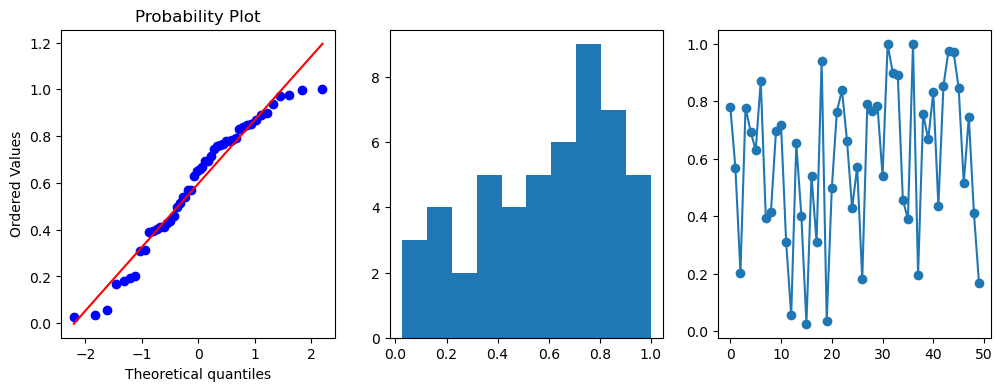

() Normality p-value = 0.038910992443561554 - Normality at alpha 5%? False


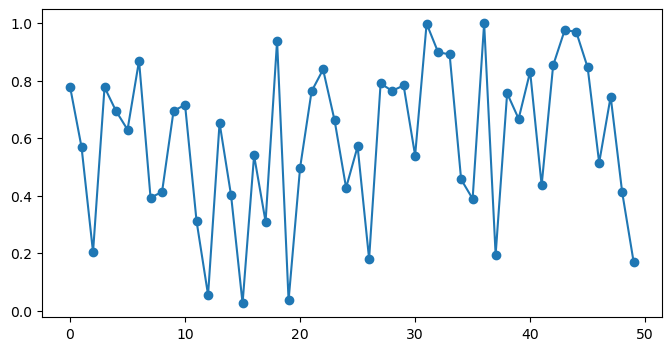

() Runs test p-value = 0.5966099949082471 - Random data at alpha 5%? True


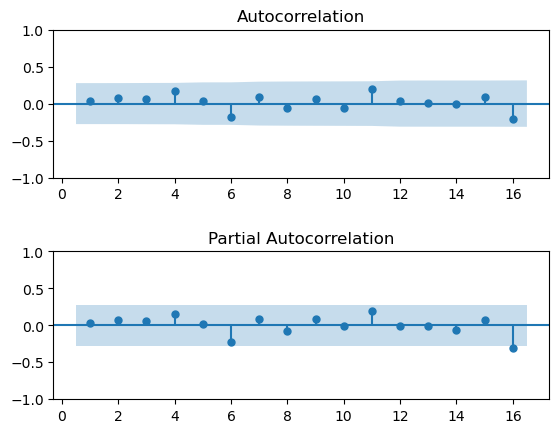

In [56]:
vals = np.random.rand(50)
check_gaussianity(vals,title="",plotto=1)
check_randomness(vals,plotto=1)
check_autocorrelation(vals)